In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import joblib as jb
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('dataset_1.csv')
df.rename( columns=  {
    'Hours_Studied' : 'study',
    'Attendance_Rate' : 'attendance',
    'Sleep_Hours' : 'sleep',
    'Practice_Tests_Taken': 'tests',
    'Exam_Score' : 'score'
}, inplace=True)
df.head()

,study,attendance,sleep,tests,score
0,47.531980,16.332245,30.778211,72.370783,203.501473
1,74.829204,26.352905,36.183803,51.136561,273.808155
2,10.010294,44.297105,32.324946,96.210698,33.519032
3,37.209932,17.863488,36.825514,33.885462,142.094957
4,23.208030,45.426758,26.898832,53.100256,54.761913


In [8]:
x = df[['study', 'attendance', 'sleep', 'tests']].values.reshape(-1,4)
y = df['score'].values.reshape(-1,1)

sc = MinMaxScaler()
x_norm = sc.fit_transform(x)
jb.dump(sc, 'scaler_1.pkl')
yn = y.min()
yx = y.max()
y = (y-yn)/(yx - yn)

In [9]:
def score(study, attendance, sleep, tests) :
    model_path = 'one.keras'
    sc = jb.load('scaler_1.pkl')
    inp = np.array([[study, attendance, sleep, tests]])
    inp = sc.transform(inp)
    if (os.path.exists(model_path)):
        model = keras.models.load_model(model_path)
    else:
        model = keras.Sequential([keras.layers.Dense(32, input_shape=(4,), activation='relu'),
                                  keras.layers.Dense(16, activation='relu'),
                                  keras.layers.Dense(units=1)])
        model.compile(optimizer = keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
        hist = model.fit(x_norm, y, epochs=500)
        lv = hist.history['loss']
        pred = model.predict(x)
        model.save('one.keras')
        plt.figure()
        plt.plot(lv)
        plt.title('loss values')
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.grid(True)
        plt.show()

        plt.figure()
        plt.scatter(y, pred, label='actual vs predicted', color='pink')
        plt.title('Actual vs Predicted')
        plt.grid(True)
        plt.xlabel('actual')
        plt.ylabel('predicted')
        plt.legend()
        plt.show()
    return model.predict(inp)[0][0]*(yx-yn)+yn

c:\Users\user\Anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2694
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2181
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.1779
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1295 
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1076 
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0866
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0702
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0647
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0561
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0538
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0564
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0481
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0460
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0424
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0378
Epoch 16/500
4/4 ━━

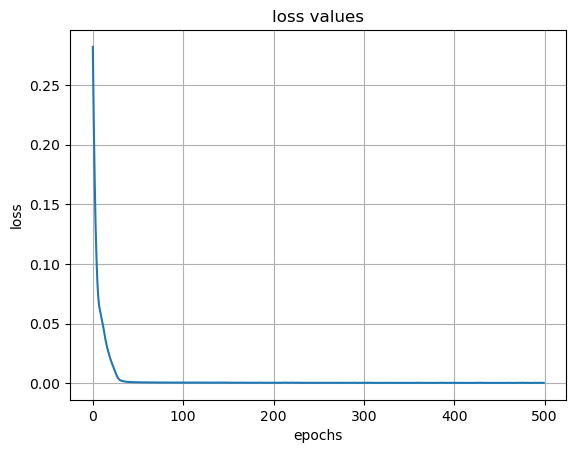

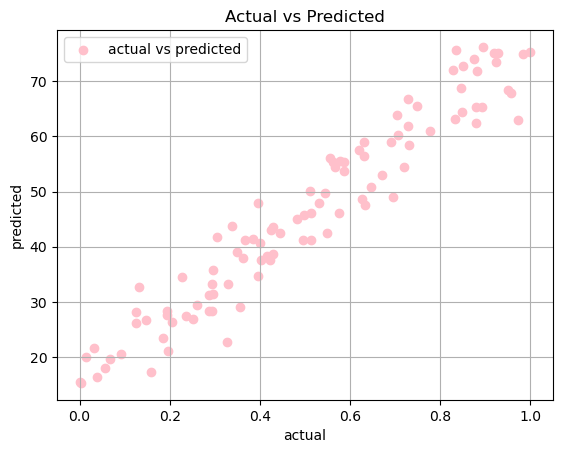

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
211.09096089994387
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
182.91404493625197
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
361.7012363035046


In [10]:
print(score(41.40, 3.33, 27.97, 83.11))
print(score(33.90, 10.16, 40.44, 71.72))
print(score(91.31, 15.87, 36.23, 73.09))